[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


              published_date published_platform  rating    type  \
0  2024-03-12T14:41:14-04:00            Desktop       3  review   
1  2024-03-11T19:39:13-04:00            Desktop       5  review   
2  2024-03-11T12:20:23-04:00            Desktop       1  review   
3  2024-03-11T07:12:27-04:00            Desktop       5  review   
4  2024-03-10T05:34:18-04:00            Desktop       2  review   

                                                text  \
0  We used this airline to go from Singapore to L...   
1  The service on Singapore Airlines Suites Class...   
2  Booked, paid and received email confirmation f...   
3  Best airline in the world, seats, food, servic...   
4  Premium Economy Seating on Singapore Airlines ...   

                                               title  helpful_votes  
0                                                 Ok              0  
1  The service in Suites Class makes one feel lik...              0  
2                         Don’t give them your mon

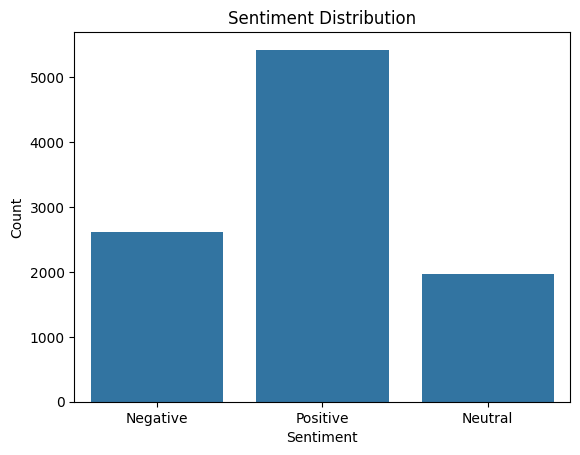

[('flight', 12182), ('singapore', 11676), ('airlines', 7537), ('service', 6863), ('food', 5581), ('good', 5259), ('airline', 3963), ('time', 3697), ('economy', 3581), ('seats', 3479)]


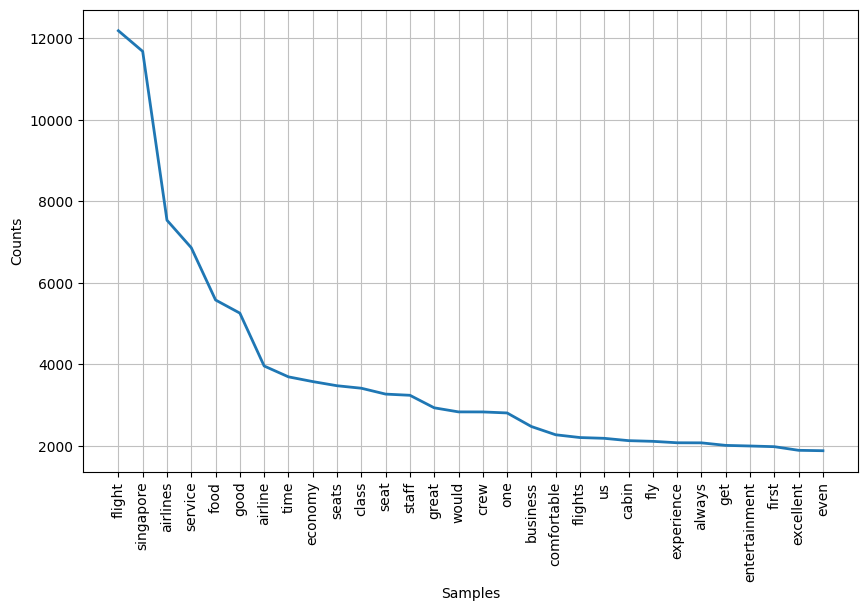

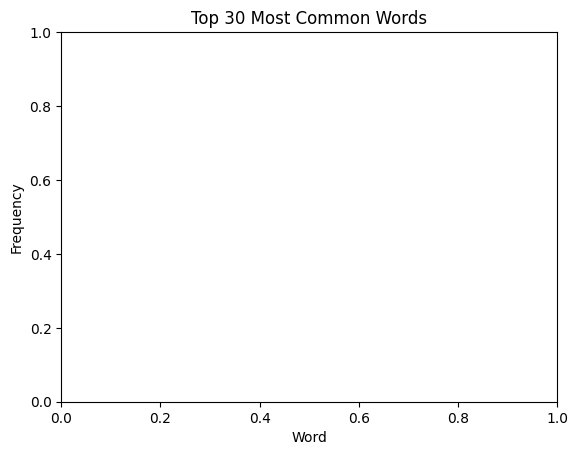

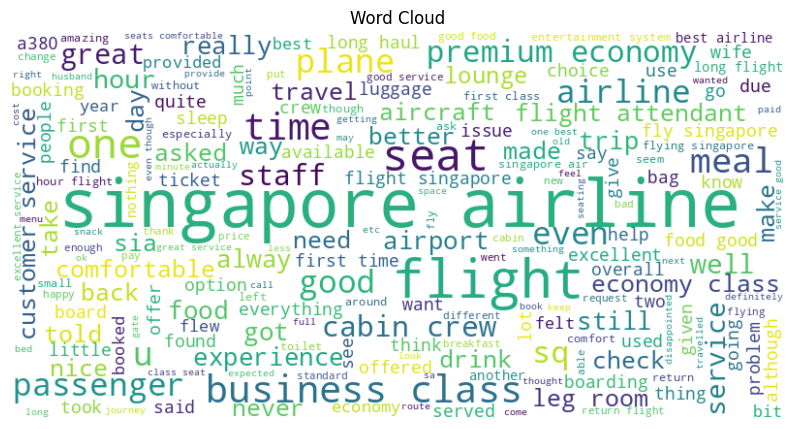

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud
df = pd.read_csv("/singapore_airlines_reviews.csv")
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')
# Explore the dataset
print(df.head())

# Sentiment analysis
def sentiment_analysis(rating):
    if rating <= 3:
        return "Negative"
    elif rating == 4:
        return "Neutral"
    else:
        return "Positive"

# Apply sentiment analysis
df['sentiment'] = df['rating'].apply(sentiment_analysis)

# Visualize sentiment distribution
sns.countplot(data=df, x='sentiment')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Tokenization and stop words removal
stop_words = set(stopwords.words('english'))

def process_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return filtered_tokens

# Apply text processing
df['processed_text'] = df['text'].apply(process_text)

# Word frequency analysis
all_words = [word for tokens in df['processed_text'] for word in tokens]
fdist = FreqDist(all_words)
print(fdist.most_common(10))

# Visualize word frequency
plt.figure(figsize=(10, 6))
fdist.plot(30, cumulative=False)
plt.title('Top 30 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

# Word cloud visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')
plt.show()